In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('data/train_clean.csv')
test = pd.read_csv('data/test_clean.csv')

In [3]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Age,Item_Category
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,12.279885,1999,OUT049,Tier 1,Small,Supermarket Type1,20,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,13.567337,2009,OUT018,Tier 3,Medium,Supermarket Type2,10,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,11.100000,1999,OUT049,Tier 1,Small,Supermarket Type1,20,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,10.300034,1998,OUT010,Tier 3,Small,Grocery Store,21,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,9.100000,1987,OUT013,Tier 3,Small,Supermarket Type1,32,NC


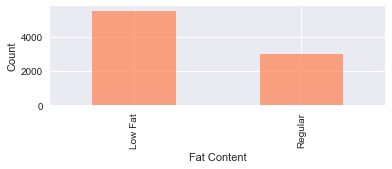

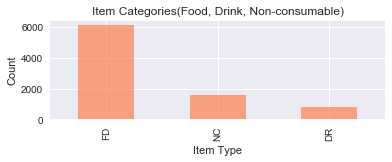

In [4]:
# Independent Categorical Variables 

_ = plt.subplot(2,1,1)
fat_content = train['Item_Fat_Content'].value_counts()
fat_content.plot(kind = 'bar', facecolor = 'coral', alpha = 0.7)
_ = plt.xlabel('Fat Content')
_ = plt.ylabel('Count')
plt.show()

_ = plt.subplot(2,1,2)
item_type = train['Item_Category'].value_counts()
item_type.plot(kind = 'bar', facecolor = 'coral', alpha = 0.7)
_ = plt.xlabel('Item Type')
_ = plt.ylabel('Count')
_ = plt.title('Item Categories(Food, Drink, Non-consumable)')
plt.show()


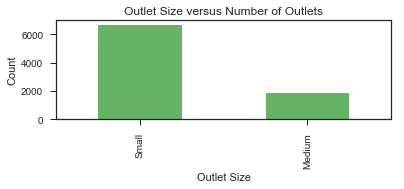

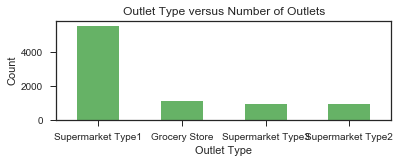

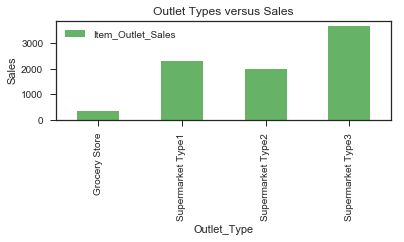

In [28]:
ax = plt.subplot(2,1,1)
outlet_size = train['Outlet_Size'].value_counts()
outlet_size.plot(kind = 'bar', facecolor = 'green', alpha = 0.6, ax = ax)
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size versus Number of Outlets')
plt.show()

ax = plt.subplot(2,1,2)
outlet_type = train['Outlet_Type'].value_counts()
outlet_type.plot(kind = 'bar', facecolor = 'green', alpha = 0.6, ax = ax)
plt.xticks( rotation='horizontal')
plt.xlabel('Outlet Type', rotation='horizontal')
plt.ylabel('Count')
plt.title('Outlet Type versus Number of Outlets')
plt.show()

ax = plt.subplot(2,1,1)
outlet_type_sales_df = train.pivot_table(values = 'Item_Outlet_Sales', index = 'Outlet_Type')
outlet_type_sales_df.plot(kind = 'bar', facecolor = 'green', alpha = 0.6, ax = ax)
plt.ylabel('Sales')
plt.title('Outlet Types versus Sales')
plt.show()

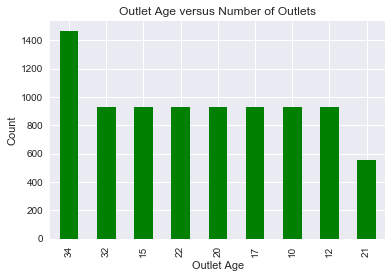

In [6]:
outlet_age = train['Outlet_Age'].value_counts()
outlet_age.plot(kind = 'bar', facecolor = 'green')
plt.xlabel('Outlet Age')
plt.ylabel('Count')
plt.title('Outlet Age versus Number of Outlets')
plt.show()

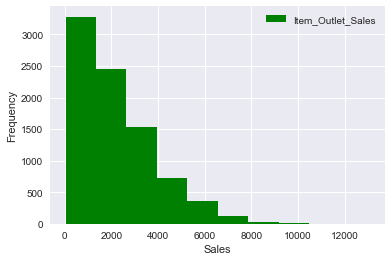

In [7]:
# Visualize the target variable - Item_outlet_Sales
train[['Item_Outlet_Sales']].plot(kind = 'hist', bins = 10, facecolor = 'green')
plt.xlabel('Sales')
plt.show()

A bit skewed to the right.

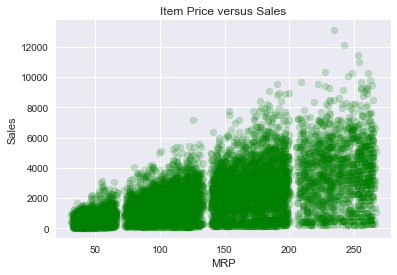

In [8]:
# Independent Variables versus target variable- Item Price vs Sales
plt.scatter(train['Item_MRP'], train['Item_Outlet_Sales'], s=None, facecolors = 'green', alpha = 0.2 )
plt.xlabel('MRP')
plt.ylabel('Sales')
plt.title('Item Price versus Sales')
plt.show()

Price can be categorized into 4 bins

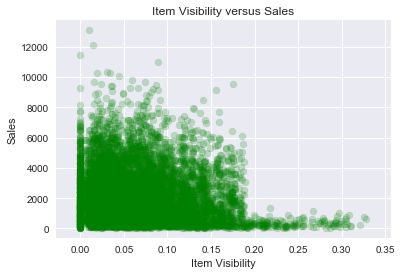

In [9]:
# Independent Variable versus target variable - Item Visibility vs Sales
plt.scatter(train['Item_Visibility'], train['Item_Outlet_Sales'], s=None, facecolors = 'green', alpha = 0.2)
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.title('Item Visibility versus Sales')
plt.show()

Right skewed, there are some outliers

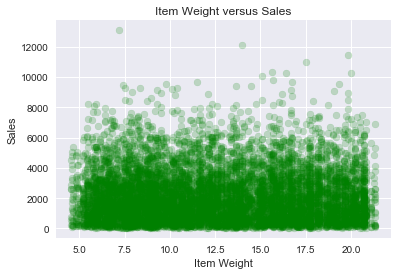

In [10]:
# Independent Variable versus target variable - Item Weight vs sales 
plt.scatter(train['Item_Weight'], train['Item_Outlet_Sales'], s=None,  facecolors = 'green', alpha = 0.2 )
plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.title('Item Weight versus Sales')
plt.show()

Some outliers here, no obvious pattern

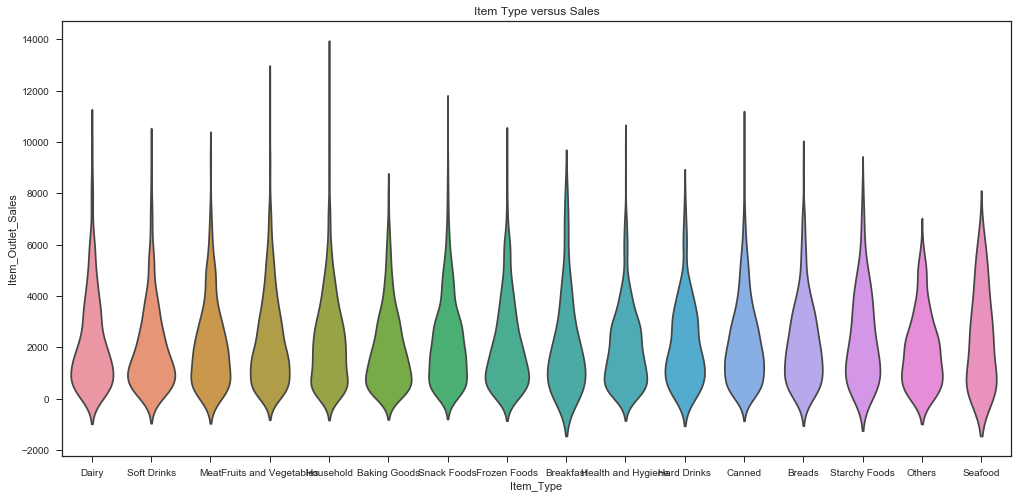

In [11]:

_ = sns.set_style('ticks')
fig, ax = plt.subplots()
_ = sns.violinplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = train, inner = None, ax = ax )
_ = fig.set_size_inches(17, 8)
plt.title('Item Type versus Sales')
plt.show()

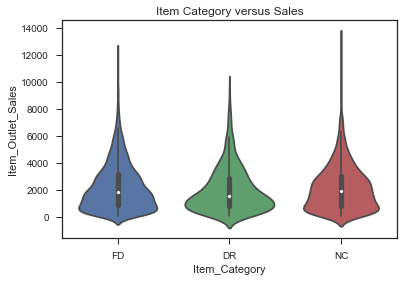

In [12]:
# Item Type versus Oulet Sales
_ = sns.violinplot(x = 'Item_Category', y = 'Item_Outlet_Sales', data = train)
 
_ = plt.title('Item Category versus Sales')
plt.show()

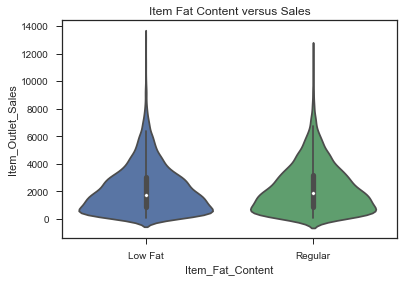

In [13]:
# Fat Content versus Outlet Sales 
_ = sns.violinplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = train)
_ = plt.title('Item Fat Content versus Sales')
plt.show()

 Distribution of Outlet Sales for Low Fat and Regular is not very distinct

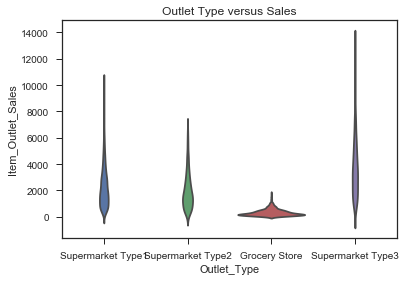

In [14]:
# Outlet Types versus Sales
_ = sns.violinplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data = train, inner = None)
_ = plt.title('Outlet Type versus Sales')
plt.show()

Grocery store has most of its data points around the lower sales values

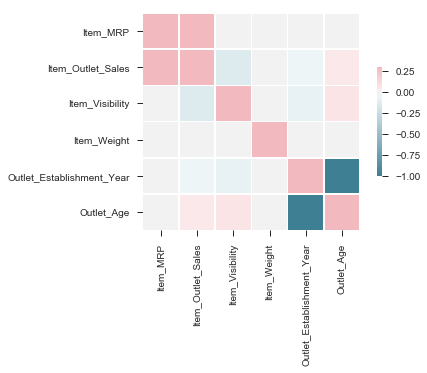

In [15]:
# Correlation_matrix

corr = train.corr()  
#cmap = sns.light_palette('green') 
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

There is a strong correlation between the item price and sales, and a negative correlation between Establishment Year and Age. This is because age is drived from the year. 

In [16]:
# Average Sales 

mean_sales = train.Item_Outlet_Sales.mean()
round(mean_sales)

2181

In [17]:
# Average sales by product

mean_item_sales = train.groupby('Item_Type')['Item_Outlet_Sales'].mean()
round(mean_item_sales)

Item_Type
Baking Goods             1953.0
Breads                   2204.0
Breakfast                2112.0
Canned                   2225.0
Dairy                    2233.0
Frozen Foods             2133.0
Fruits and Vegetables    2289.0
Hard Drinks              2139.0
Health and Hygiene       2010.0
Household                2259.0
Meat                     2159.0
Others                   1926.0
Seafood                  2326.0
Snack Foods              2277.0
Soft Drinks              2007.0
Starchy Foods            2374.0
Name: Item_Outlet_Sales, dtype: float64

In [18]:
# Average and median sales by product category

mean_category_sales = train.groupby('Item_Category')['Item_Outlet_Sales'].aggregate(['mean', 'median'])
round(mean_category_sales)

,mean,median
Item_Category,,
DR,1997.0,1497.0
FD,2215.0,1811.0
NC,2143.0,1875.0


In [19]:
# Average sales by product per Outlet

product_outlet_sales = train.groupby(['Outlet_Type', 'Item_Category'])['Item_Outlet_Sales'].mean()
round(product_outlet_sales)

Outlet_Type        Item_Category
Grocery Store      DR                308.0
                   FD                339.0
                   NC                357.0
Supermarket Type1  DR               2132.0
                   FD               2345.0
                   NC               2300.0
Supermarket Type2  DR               1908.0
                   FD               2011.0
                   NC               1978.0
Supermarket Type3  DR               3294.0
                   FD               3777.0
                   NC               3551.0
Name: Item_Outlet_Sales, dtype: float64

In [20]:
product_outlet_sales.unstack(level = -1)

Item_Category,DR,FD,NC
Outlet_Type,,,
Grocery Store,308.352828,339.178036,356.812535
Supermarket Type1,2131.968471,2345.000684,2300.411411
Supermarket Type2,1907.604188,2011.026574,1977.949403
Supermarket Type3,3294.133992,3776.820790,3551.136134


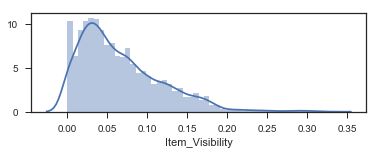

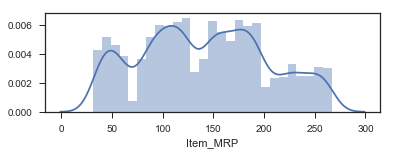

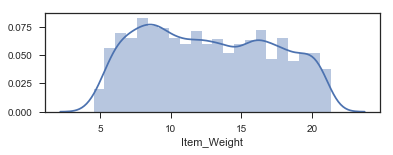

In [21]:
plt.subplot(2,1,1)
_ = sns.distplot(train.Item_Visibility)
plt.show()

plt.subplot(2,1,2)
_ = sns.distplot(train.Item_MRP)
plt.show()

plt.subplot(2,1,1)
_ = sns.distplot(train.Item_Weight)
plt.show()

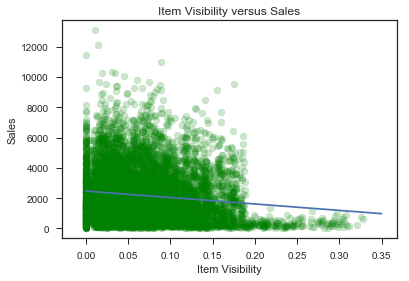

In [22]:
# Item visibility versus Sales - line of best fit
a, b = np.polyfit(train.Item_Visibility, train.Item_Outlet_Sales, 1)
x_lr = np.array([0.00, 0.35])
y_lr = a * x_lr + b

_ = plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, s=None, facecolors = 'green', alpha = 0.2 )
_ = plt.plot(x_lr, y_lr)

_ = plt.xlabel('Item Visibility')
_ = plt.ylabel('Sales')
_ = plt.title('Item Visibility versus Sales')
plt.show()

There is a negative linear correlation between item visibility and Sales.

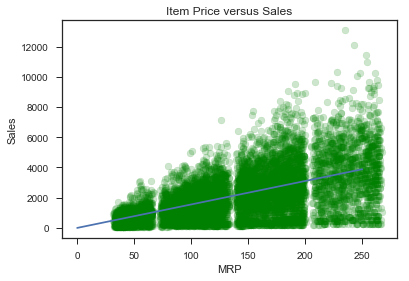

In [23]:
# Item visibility versus Sales - line of best fit
a, b = np.polyfit(train.Item_MRP, train.Item_Outlet_Sales, 1)
x_lr = np.array([0, 250])
y_lr = a * x_lr + b

_ = plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, s=None, facecolors = 'green', alpha = 0.2 )
_ = plt.plot(x_lr, y_lr)

_ = plt.xlabel('MRP')
_ = plt.ylabel('Sales')
_ = plt.title('Item Price versus Sales')
plt.show()

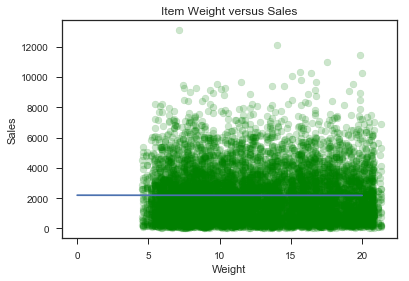

In [24]:
# Item visibility versus Sales - line of best fit
a, b = np.polyfit(train.Item_Weight, train.Item_Outlet_Sales, 1)
x_lr = np.array([0.0, 20.0])
y_lr = a * x_lr + b

_ = plt.scatter(train.Item_Weight, train.Item_Outlet_Sales, s=None, facecolors = 'green', alpha = 0.2 )
_ = plt.plot(x_lr, y_lr)

_ = plt.xlabel('Weight')
_ = plt.ylabel('Sales')
_ = plt.title('Item Weight versus Sales')
plt.show()

In [25]:
# Pearson Correlation coefficient

corr_vis = np.corrcoef(train.Item_Visibility, train.Item_Outlet_Sales )
print(corr_vis[0,1]) 

-0.1286246122207703


The observed significance value of -0.12 shows a negative corrleation between item visibility and sales
 



 

In [26]:
corr_mrp = np.corrcoef(train.Item_MRP, train.Item_Outlet_Sales)
print(corr_mrp[0,1]) 

0.5675744466569194


There is a positive correlation between price and sales.

In [27]:
corr_wei = np.corrcoef(train.Item_Weight, train.Item_Outlet_Sales)
print(corr_wei[0,1]) 

-0.001971298228759017


There is no correlation between weight of the item and its sale.